# Sentiment Analysis Project: Amazon Food Review

- Conducted detailed sentiment analysis on Amazon food reviews.
- Utilized advanced NLP techniques and tools including TextBlob, VADER, RoBERTa for sentiment analysis.
- Employed Matplotlib and Seaborn for data visualization.
- Processed text data for sentiment classification.
- Visualized outcomes to understand customer sentiments towards food products on Amazon.
- Combined rule-based and machine learning strategies for accurate sentiment identification.
- Aimed to provide insights for product improvement and customer satisfaction.
- Established a model for future sentiment analysis tasks.

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
import sklearn
import nltk
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings 
warnings. filterwarnings('ignore')

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in data
df = pd.read_csv("D:\Clark University\Semester 3\Capstone Practicum\Reviews\Reviews.csv")
print(df.shape)
df = df.head(10000)
print(df.shape)

(568454, 10)
(10000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### 2. Data Cleaning

In [4]:
# Fill missing values for 'ProfileName' and 'Summary' with 'Unknown'

df['ProfileName'].fillna('Unknown', inplace=True)
df['Summary'].fillna('Unknown', inplace=True)

In [5]:
# Calculate the length of each review

df['ReviewLength'] = df['Text'].apply(len)
print (df['ReviewLength'])

0        263
1        190
2        509
3        219
4        140
        ... 
9995     437
9996     477
9997     927
9998     118
9999    1061
Name: ReviewLength, Length: 10000, dtype: int64


In [6]:
# Download necessary NLTK data

nltk.download('omw-1.4')
nltk.download('punkt')  # Punkt Tokenizer Models
nltk.download('wordnet')  # WordNet
nltk.download('stopwords')  # Stopwords

# Initialize lemmatizer and stop words list

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom tokenizer function that incorporates tokenization, stop word removal, and lemmatization

def custom_tokenizer(text):
    
    # Remove HTML line break tags
    
    text = re.sub(r'<br\s*/?>', ' ', text)
    
    # Tokenize
    
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    
    nostop = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    # Lemmatize
    
    lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
    return lemmatized

def clean_review(text):
    """Remove special characters and split into words."""
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    return text.split()

# Concatenate all reviews into one large text
all_reviews = ' '.join(df['Text'].apply(custom_tokenizer).apply(clean_review).apply(' '.join))

# Count word occurrences
word_counts = Counter(all_reviews.split())

# Most common words
most_common_words = word_counts.most_common(20)
print(most_common_words)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Manan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('i', 27583), ('like', 4492), ('the', 4037), ('coffee', 3941), ('taste', 3684), ('it', 3520), ('good', 3505), ('flavor', 3486), ('one', 3155), ('product', 3019), ('great', 2858), ('this', 2711), ('love', 2503), ('would', 2308), ('food', 2051), ('make', 1898), ('tea', 1791), ('really', 1790), ('get', 1733), ('time', 1647)]


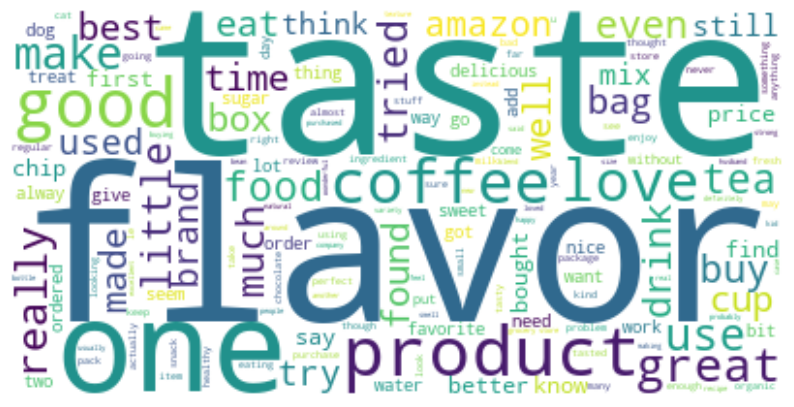

In [7]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(all_reviews)

# Display the word cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. Exploratory Data Analysis

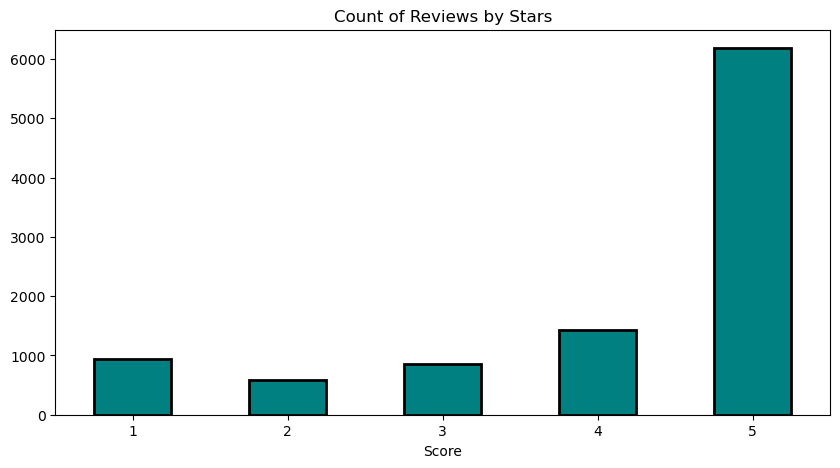

In [8]:
bar = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', color='teal', edgecolor='black', linewidth=2, figsize=(10, 5))
plt.xticks(rotation=0)
plt.show()

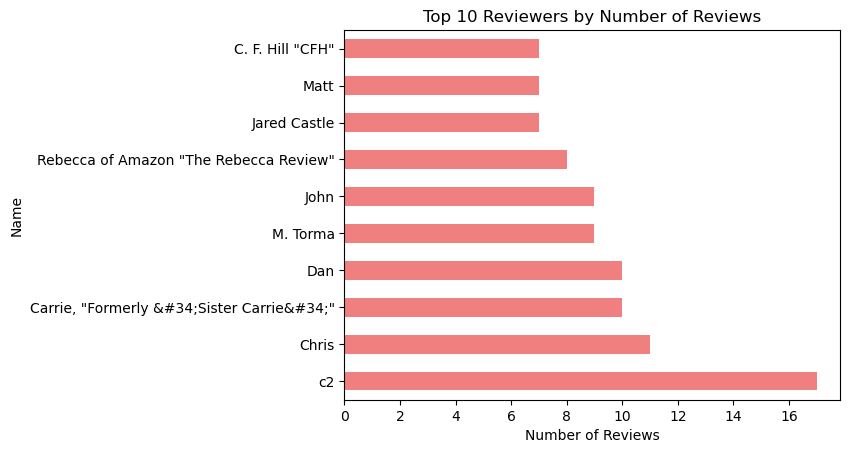

In [9]:
# Top 10 reviewers based on the number of reviews
top_reviewers = df['ProfileName'].value_counts().head(10)

top_reviewers.plot(kind='barh', color= 'lightcoral')
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Name')
plt.show()

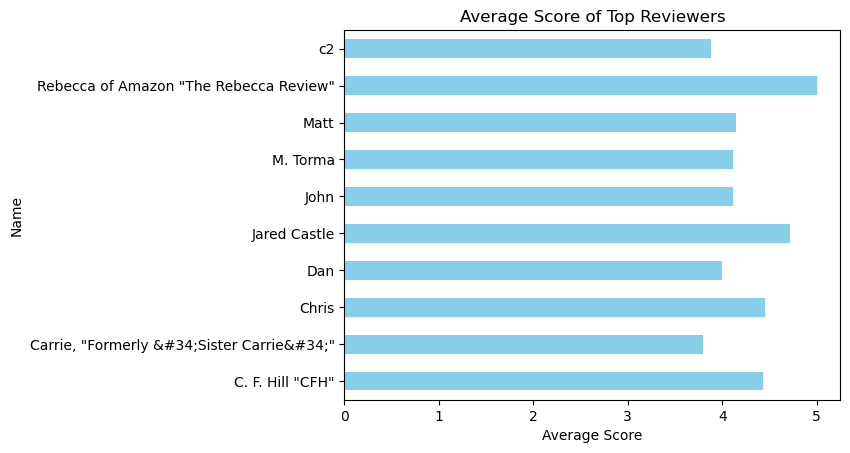

In [10]:
# Calculate average score for top reviewers
avg_score_top_reviewers = df[df['ProfileName'].isin(top_reviewers.index)].groupby('ProfileName')['Score'].mean()

avg_score_top_reviewers.plot(kind='barh', color='skyblue')
plt.title('Average Score of Top Reviewers')
plt.xlabel('Average Score')
plt.ylabel('Name')
plt.show()

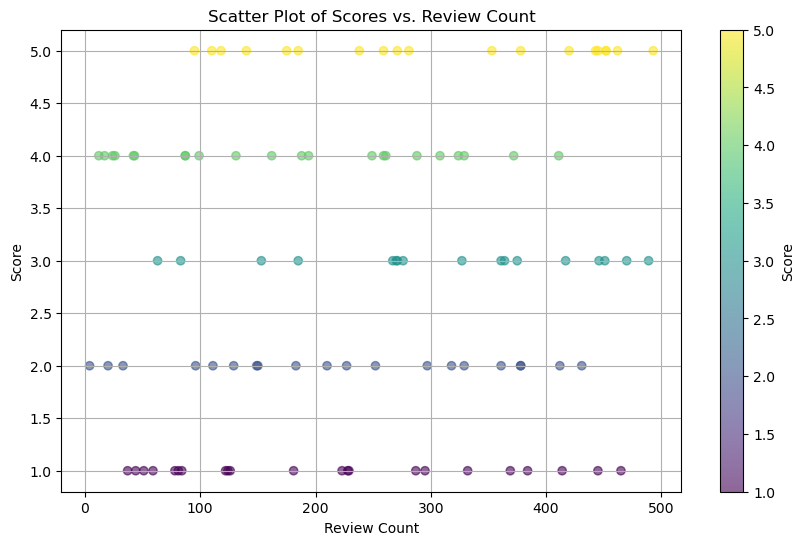

In [11]:
# Generating sample data for demonstration
np.random.seed(0)
scores = np.random.randint(1, 6, 100)  # Random scores between 1 and 5
review_counts = np.random.randint(1, 500, 100)  # Random review counts between 1 and 500

# Creating a DataFrame
df1 = pd.DataFrame({'Score': scores, 'ReviewCount': review_counts})

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df1['ReviewCount'], df1['Score'], alpha=0.6, c=df1['Score'], cmap='viridis')
plt.title('Scatter Plot of Scores vs. Review Count')
plt.xlabel('Review Count')
plt.ylabel('Score')
plt.colorbar(label='Score')
plt.grid(True)
plt.show()

In [12]:
from textblob import TextBlob

# Compute sentiment scores
df['Sentiment'] = df['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Classify reviews as 'positive', 'neutral', or 'negative'
df['SentimentType'] = pd.cut(df['Sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,Sentiment,SentimentType
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive


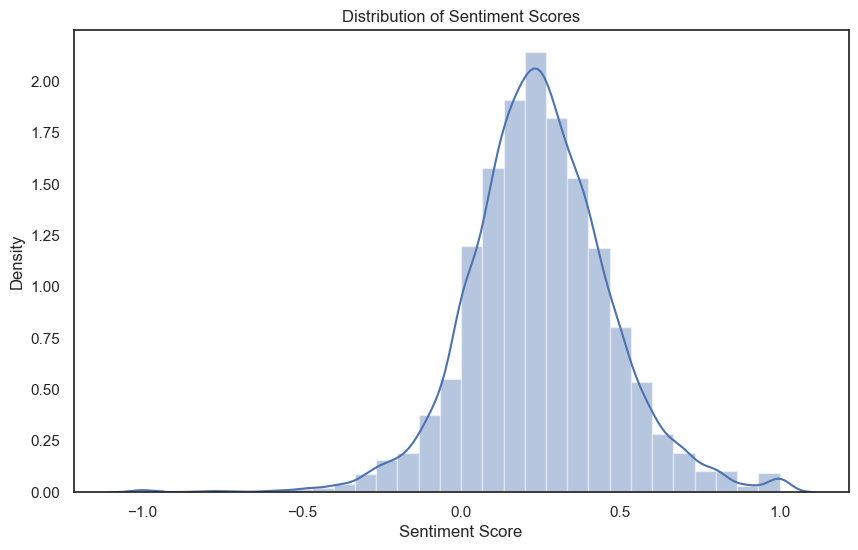

In [13]:
# Set style for seaborn
sns.set(style="white")

# Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['Sentiment'], kde=True, bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

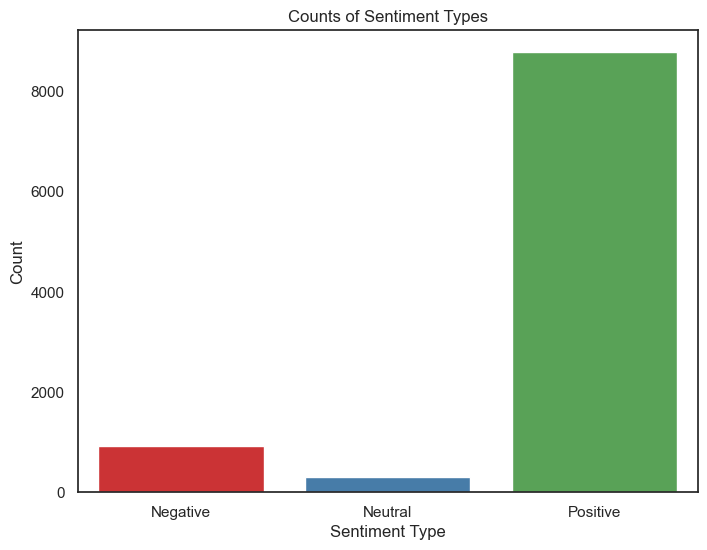

In [14]:
# Sentiment Type Counts
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SentimentType', palette = "Set1")
plt.title('Counts of Sentiment Types')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

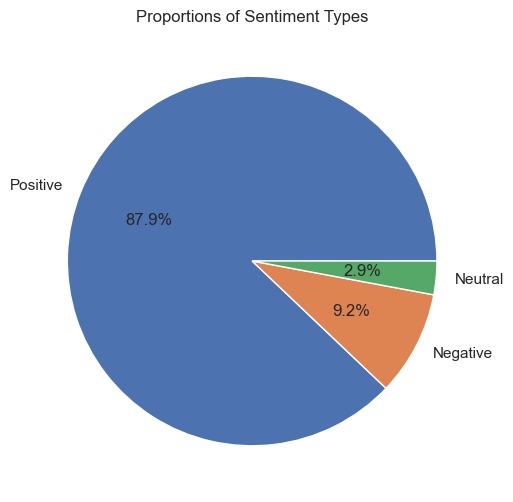

In [15]:
# Sentiment Type Proportions

sentiment_type_counts = df['SentimentType'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportions of Sentiment Types')
plt.ylabel('')
plt.show()

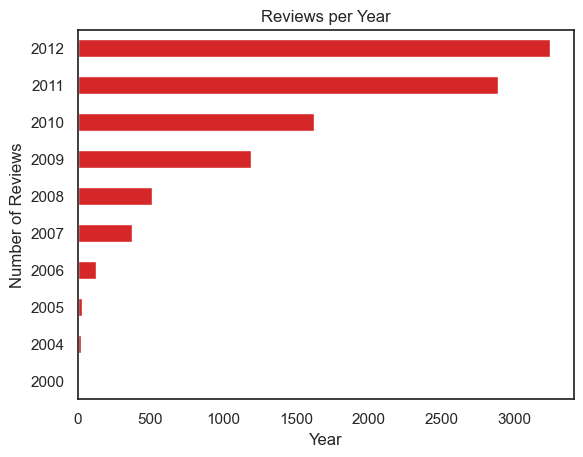

In [16]:
# Convert UNIX time to datetime
df['ReviewTime'] = pd.to_datetime(df['Time'], unit='s')

# Example: Plotting review count by year

df['Year'] = df['ReviewTime'].dt.year
reviews_per_year = df.groupby('Year').size()
reviews_per_year.plot(kind='barh', color = '#d62728')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Reviews per Year')
sns.set(style="white")
plt.show()

In [17]:
# Count reviews per user
reviews_per_user = df.groupby('UserId').size().sort_values(ascending=False)

# Identify users with more than 50 reviews
frequent_reviewers = reviews_per_user[reviews_per_user > 50]
print(frequent_reviewers)

Series([], dtype: int64)


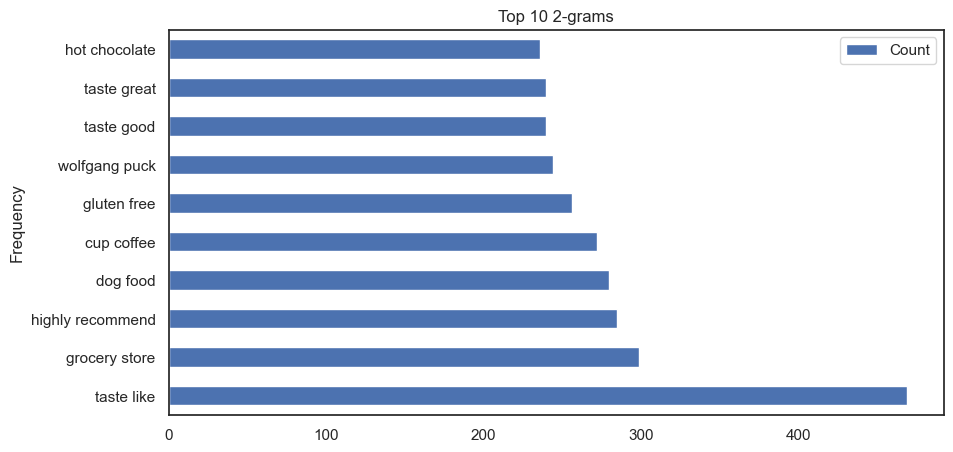

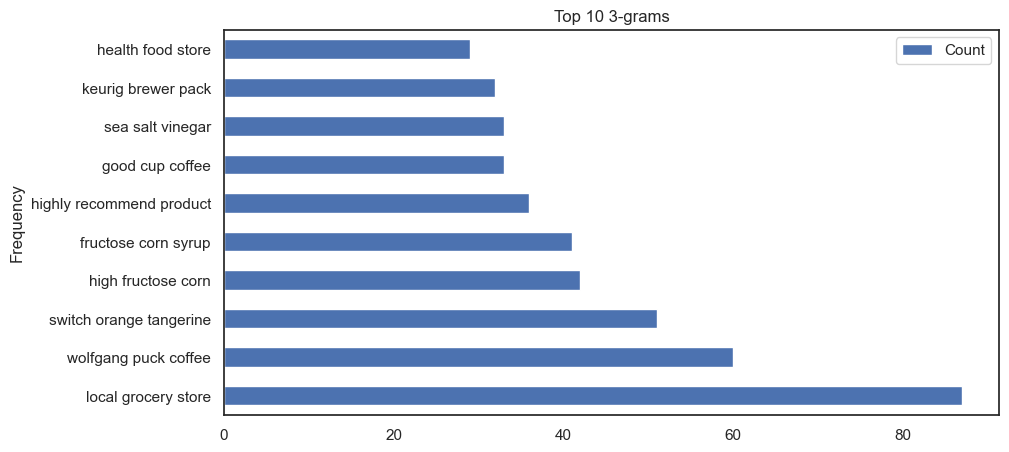

In [18]:
# Function to plot n-grams
def plot_ngrams(text_series, n=2, ngrams=10):
    vec = CountVectorizer(ngram_range=(n, n), tokenizer=custom_tokenizer, stop_words='english')
    bag_of_words = vec.fit_transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:ngrams]

    # Convert to DataFrame and plot
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=['n-gram', 'Count'])
    top_ngrams_df.set_index('n-gram', inplace=True)
    top_ngrams_df.plot(kind='barh', figsize=(10, 5))
    plt.title(f'Top {ngrams} {n}-grams')
    plt.ylabel('Frequency')
    sns.set(style="white")
    plt.show()

# Assuming df['Text'] is a Pandas Series containing the text documents
plot_ngrams(df['Text'], n=2, ngrams=10)  # Bi-grams
plot_ngrams(df['Text'], n=3, ngrams=10)  # Tri-grams

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def top_tfidf_feats(row, features, top_n=20):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['feature', 'tfidf'])
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

# Fit TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = tfidf.fit_transform(df['Text'])
features = tfidf.get_feature_names_out()

# Example: Top TF-IDF features for the first document
print(top_feats_in_doc(X_tfidf, features, 0, 10))

       feature     tfidf
0     vitality  0.367422
1  appreciates  0.367422
2         stew  0.325301
3      finicky  0.300408
4       better  0.265302
5    processed  0.263097
6       smells  0.227574
7       canned  0.224774
8        looks  0.221520
9         meat  0.219384


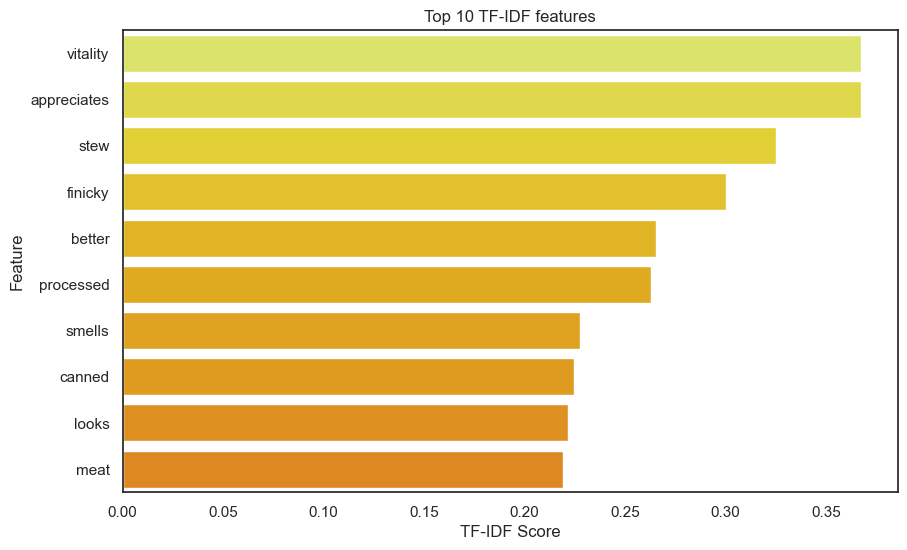

In [20]:
top_tfidf = top_feats_in_doc(X_tfidf, features, 0, 10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf', y='feature', data=top_tfidf, palette='Wistia')
plt.title('Top 10 TF-IDF features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
sns.set(style="white")
plt.show()

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012


In [22]:
from textblob import TextBlob

# Compute sentiment scores
df['Sentiment'] = df['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Classify reviews as 'positive', 'neutral', or 'negative'
df['SentimentType'] = pd.cut(df['Sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012


In [23]:
Stype= TextBlob(df['Text'][0]).sentiment.polarity
Stype

0.45

In [24]:
def predictTextBlob(Str):
    Sscore = 0
    Stype = ''
    Sscore= TextBlob(Str).sentiment.polarity
    if Sscore <= -0.01:
        Stype = 'Negative'
    elif Sscore >= 0.01:
        Stype = 'Positive'
    else:
        Stype = 'Neutral'
    return Stype,Sscore

In [25]:
predictTextBlob(df['Text'][0])

('Positive', 0.45)

In [26]:
predictTextBlob('This Oatmeal is mushy. Quaker oats tastes better')

('Positive', 0.5)

### Vader

In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Manan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
sia.polarity_scores('I am so HAPPY!! :)')

{'neg': 0.0, 'neu': 0.189, 'pos': 0.811, 'compound': 0.8621}

In [29]:
sia.polarity_scores('This Oatmeal is mushy. Quaker oats tastes better')

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

In [30]:
sia.polarity_scores('Ashmi, you did a great job')

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

In [31]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [32]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [33]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012


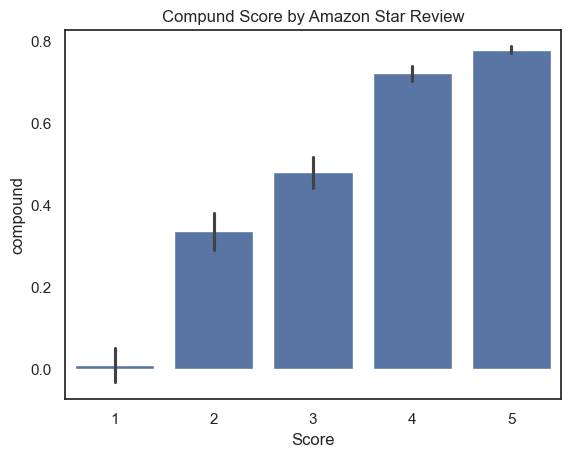

In [34]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')

plt.show()

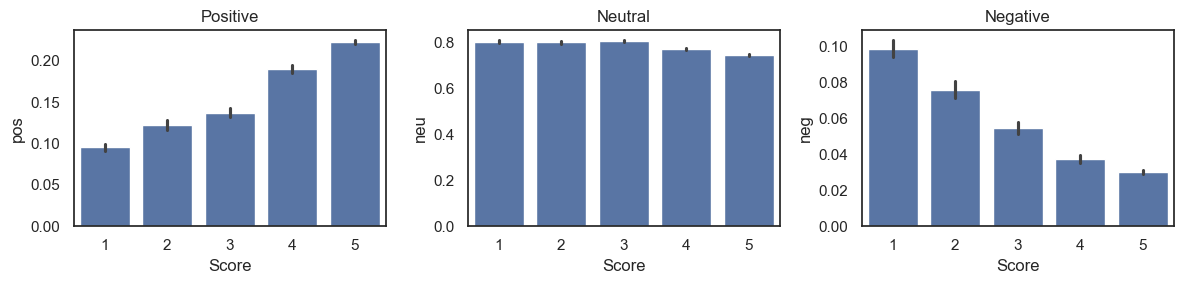

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

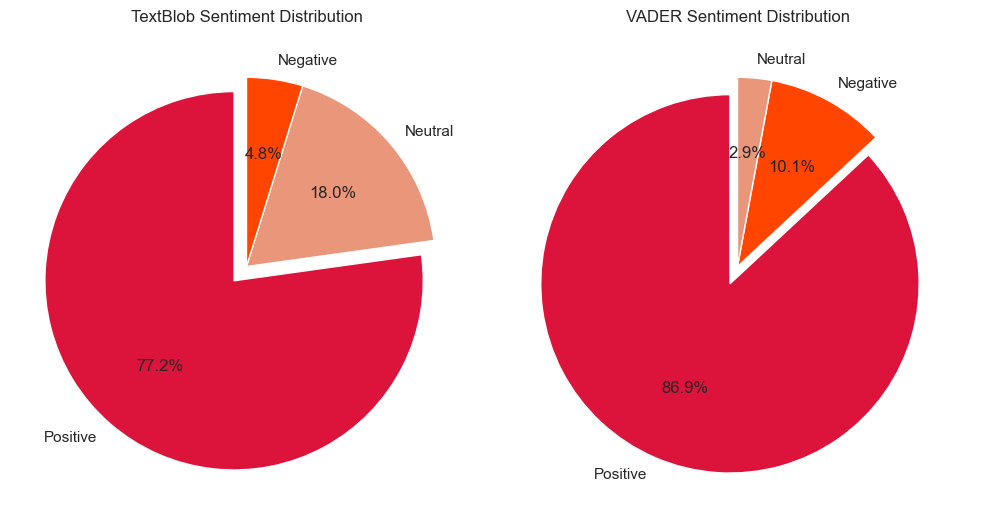

In [177]:
# Categorize TextBlob Scores
vaders['TextBlob_Category'] = pd.cut(vaders['Sentiment'], bins=[-np.inf, -0.1, 0.1, np.inf], labels=['Negative', 'Neutral', 'Positive'])

# Categorize VADER Scores
vaders['VADER_Category'] = pd.cut(vaders['compound'], bins=[-np.inf,  -0.1, 0.1,  np.inf], labels=['Negative', 'Neutral', 'Positive'])

# Count categories for TextBlob and VADER
textblob_counts = vaders['TextBlob_Category'].value_counts()
vader_counts = vaders['VADER_Category'].value_counts()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Define your new colors here
new_colors = ['crimson', 'darksalmon', 'orangered']
new_colors1 = ['crimson', 'orangered', 'darksalmon']

explode = (0.1, 0, 0)

# TextBlob Pie Chart
axs[0].pie(textblob_counts, labels=textblob_counts.index, autopct='%1.1f%%', startangle=90, colors=new_colors, explode=explode)
axs[0].set_title('TextBlob Sentiment Distribution')

# VADER Pie Chart
axs[1].pie(vader_counts, labels=vader_counts.index, autopct='%1.1f%%', startangle=90, colors=new_colors1, explode=explode)
axs[1].set_title('VADER Sentiment Distribution')

plt.tight_layout()
plt.show()


In [40]:
predictTextBlob("This is a very healthy dog food. Good for their digestion. \
                Also good for small puppies. My dog eats her required amount at every feeding.")

('Positive', 0.44999999999999996)

In [41]:
sia.polarity_scores("This is a very healthy dog food. Good for their digestion. \
                    Also good for small puppies. My dog eats her required amount at every feeding.")

{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}

In [42]:
sia.polarity_scores("good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!")

{'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466}

In [43]:
predictTextBlob("good flavor! these came securely packed... they were fresh and delicious! i love these Twizzlers!")

('Positive', 0.64)

In [45]:
# Calculate percentages for TextBlob
textblob_percentages = vaders['TextBlob_Category'].value_counts(normalize=True) * 100

# Calculate percentages for VADER
vader_percentages = vaders['VADER_Category'].value_counts(normalize=True) * 100

# Print the percentages
print("TextBlob Sentiment Percentages:")
print(textblob_percentages)

print("\nVADER Sentiment Percentages:")
print(vader_percentages)


TextBlob Sentiment Percentages:
TextBlob_Category
Positive    77.2
Neutral     18.0
Negative     4.8
Name: proportion, dtype: float64

VADER Sentiment Percentages:
VADER_Category
Positive    86.94
Negative    10.15
Neutral      2.91
Name: proportion, dtype: float64


## Roberta

* Use a model trained of a large corpus of data.
* Transformer model accounts for the words but also the context related to other words.

In [47]:
#!pip install transformers

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [48]:
#!pip install torch torchvision torchaudio

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [49]:
example = vaders['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [50]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}


In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [52]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(vaders, how='left')

In [54]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,Summary,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year,TextBlob_Category,VADER_Category,SentimentRange
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,0.000,0.695,...,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011,Positive,Positive,"(0.379, 1.0]"
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,0.138,0.862,...,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012,Neutral,Negative,"(-1.001, 0.113]"
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,0.091,0.754,...,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008,Positive,Positive,"(0.113, 0.242]"
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,0.000,1.000,...,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011,Positive,Neutral,"(0.113, 0.242]"
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,0.000,0.552,...,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012,Positive,Positive,"(0.379, 1.0]"


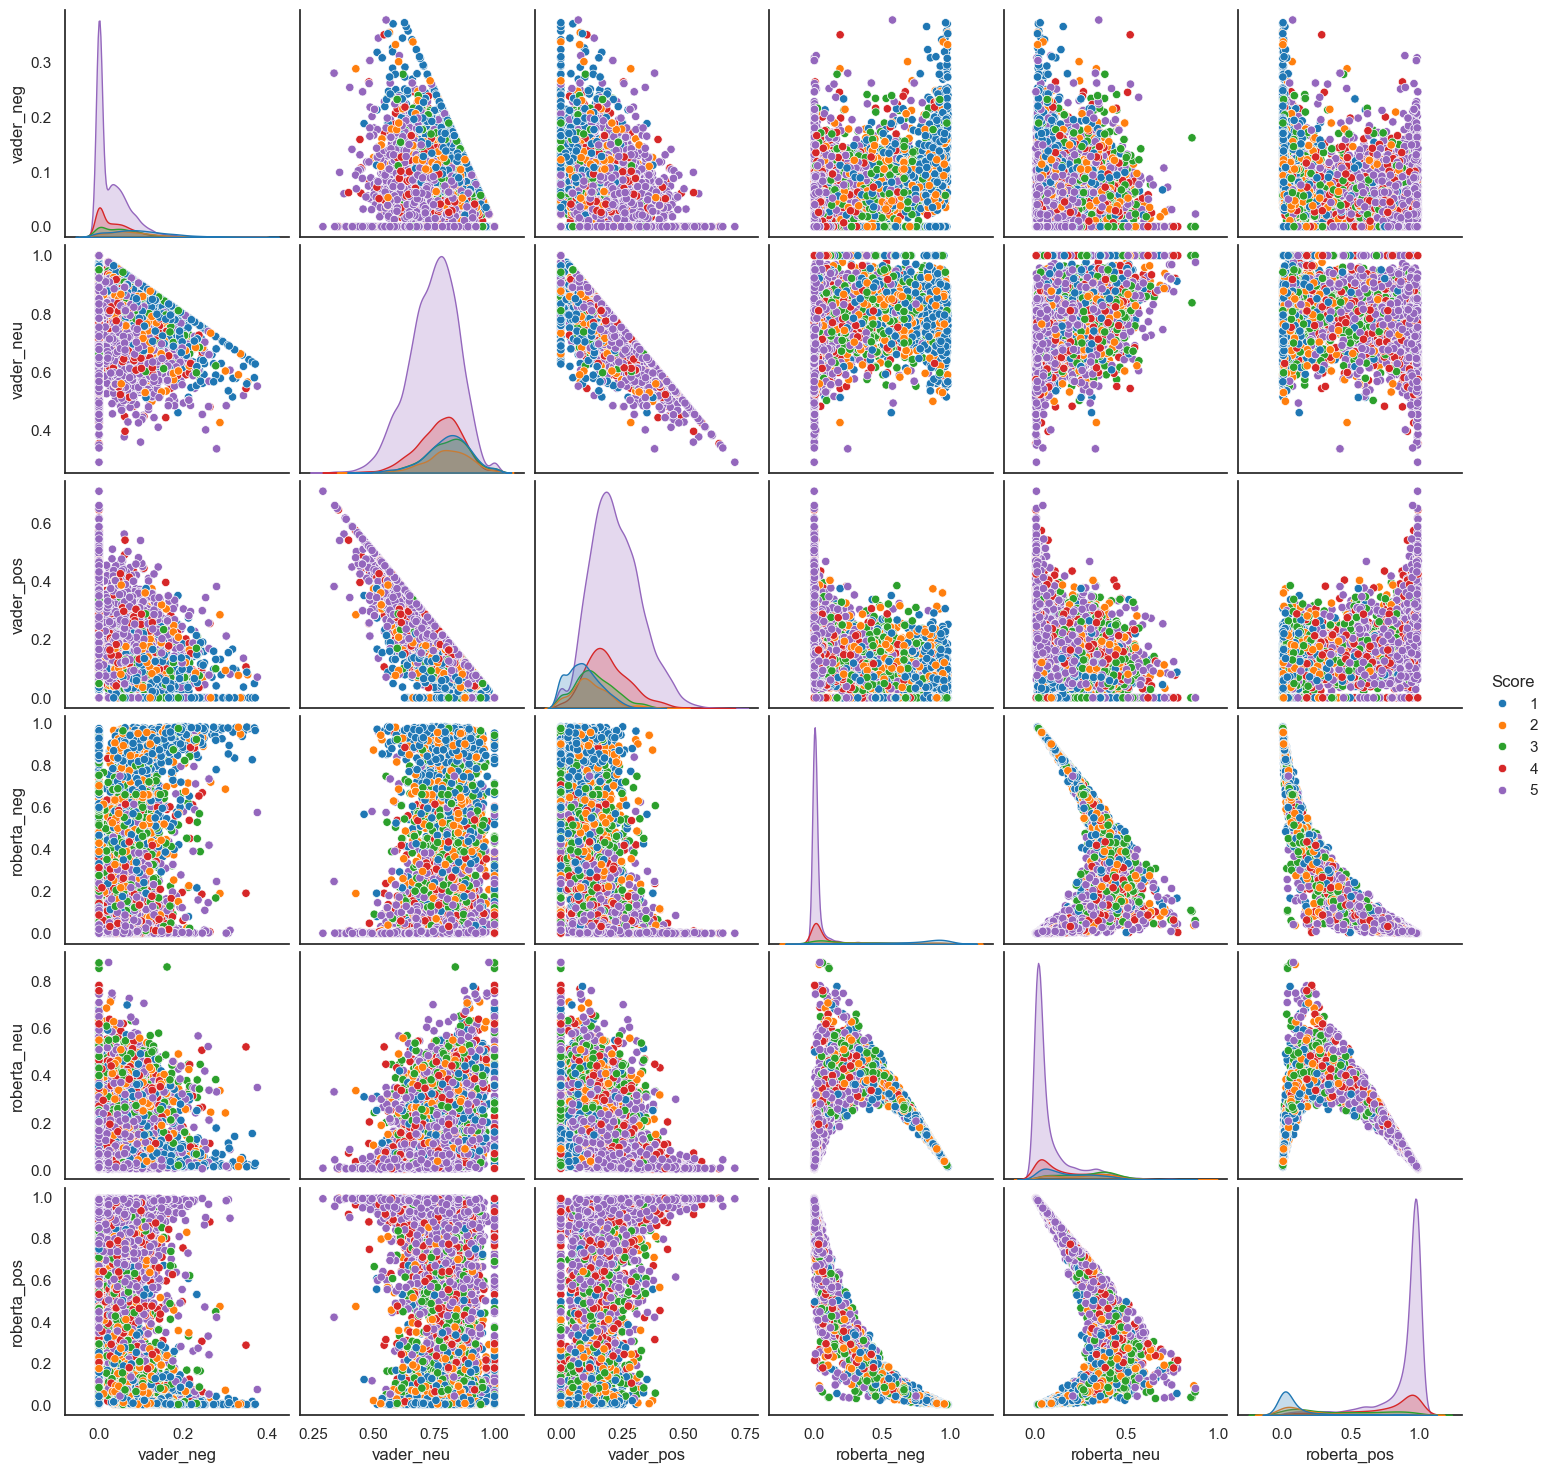

In [55]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [56]:
results_df.drop(['compound'], axis=1, inplace=True)
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,Summary,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year,TextBlob_Category,VADER_Category,SentimentRange
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,0.000,0.695,...,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011,Positive,Positive,"(0.379, 1.0]"
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,0.138,0.862,...,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012,Neutral,Negative,"(-1.001, 0.113]"
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,0.091,0.754,...,"""Delight"" says it all",This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008,Positive,Positive,"(0.113, 0.242]"
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,0.000,1.000,...,Cough Medicine,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011,Positive,Neutral,"(0.113, 0.242]"
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,0.000,0.552,...,Great taffy,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012,Positive,Positive,"(0.379, 1.0]"


In [57]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [58]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

* nevative sentiment 5-Star view

In [59]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [60]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [61]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [62]:
sent_pipeline('I love sentiment analysis!!')

[{'label': 'POSITIVE', 'score': 0.9997537732124329}]

In [63]:
sia.polarity_scores("I love sentiment analysis!")

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}

In [64]:
predictTextBlob("I love sentiment analysis!")

('Positive', 0.625)

In [68]:
predictTextBlob("I like this but it could be better")

('Positive', 0.5)

In [69]:
sia.polarity_scores("I like this but it could be better")

{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.6808}

In [70]:
polarity_scores_roberta("I like this but it could be better")

{'roberta_neg': 0.15470381,
 'roberta_neu': 0.36903933,
 'roberta_pos': 0.4762569}

In [73]:
predictTextBlob("I have bought several of the Vitality canned dog food products and have found them all to be of good quality.\
                The product looks more like a stew than a processed meat and it smells better. \
                My Labrador is finicky and she appreciates this product better than  most.")

('Positive', 0.45)

In [74]:
sia.polarity_scores("I have bought several of the Vitality canned dog food products and have found them all to be of good quality.\
                    The product looks more like a stew than a processed meat and it smells better. \
                    My Labrador is finicky and she appreciates this product better than  most.")

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [75]:
polarity_scores_roberta("I have bought several of the Vitality canned dog food products and have found them all to be of \
                        good quality. The product looks more like a stew than a processed meat and it smells better. \
                        My Labrador is finicky and she appreciates this product better than  most.")

{'roberta_neg': 0.007168007,
 'roberta_neu': 0.036933597,
 'roberta_pos': 0.9558984}

   roberta_neg  roberta_neu  roberta_pos  polarity_score
0     0.009624     0.049980     0.940395        0.930771
1     0.508986     0.452414     0.038600       -0.470386
2     0.003229     0.098067     0.898704        0.895475
3     0.002295     0.090219     0.907486        0.905191
4     0.001635     0.010302     0.988063        0.986428


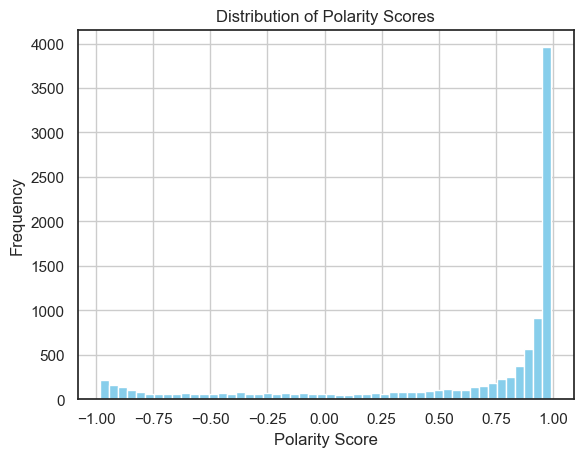

In [77]:

# Calculate the polarity score
results_df['polarity_score'] = results_df['roberta_pos'] - results_df['roberta_neg']

# Display the first few rows to verify the calculation
print(results_df[['roberta_neg', 'roberta_neu', 'roberta_pos', 'polarity_score']].head())

# Histogram to visualize the distribution of polarity scores
plt.hist(results_df['polarity_score'], bins=50, color='skyblue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [81]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,Text,ReviewLength,Sentiment,SentimentType,ReviewTime,Year,TextBlob_Category,VADER_Category,SentimentRange,polarity_score
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,0.000,0.695,...,I have bought several of the Vitality canned d...,263,0.450000,Positive,2011-04-27,2011,Positive,Positive,"(0.379, 1.0]",0.930771
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,0.138,0.862,...,Product arrived labeled as Jumbo Salted Peanut...,190,-0.033333,Negative,2012-09-07,2012,Neutral,Negative,"(-1.001, 0.113]",-0.470386
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,0.091,0.754,...,This is a confection that has been around a fe...,509,0.133571,Positive,2008-08-18,2008,Positive,Positive,"(0.113, 0.242]",0.895475
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,0.000,1.000,...,If you are looking for the secret ingredient i...,219,0.166667,Positive,2011-06-13,2011,Positive,Neutral,"(0.113, 0.242]",0.905191
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,0.000,0.552,...,Great taffy at a great price. There was a wid...,140,0.483333,Positive,2012-10-21,2012,Positive,Positive,"(0.379, 1.0]",0.986428


In [109]:
def categorize_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

results_df['sentiment'] = results_df['polarity_score'].apply(categorize_sentiment)


In [110]:
sentiment_distribution = results_df['sentiment'].value_counts(normalize=True) * 100


sentiment
positive    79.308259
negative    17.969144
neutral      2.722598
Name: proportion, dtype: float64


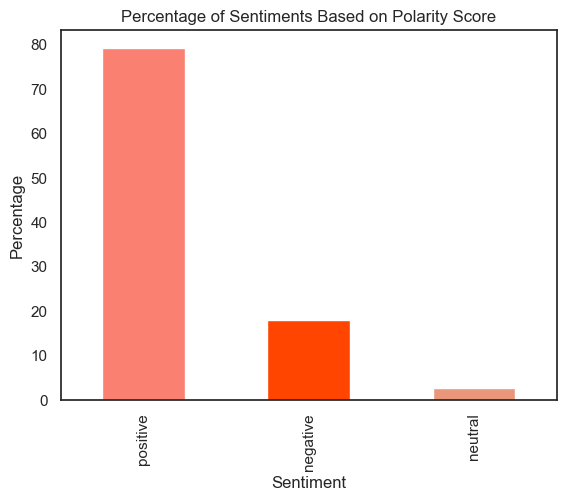

In [121]:
print(sentiment_distribution)

# Optional: Plotting
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['salmon', 'orangered', 'darksalmon'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Percentage of Sentiments Based on Polarity Score')
plt.show()


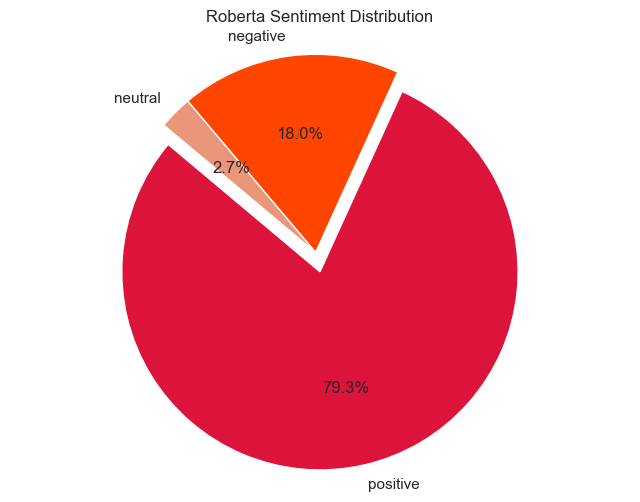

In [173]:
# Creating the pie chart
colors = ['crimson', 'orangered', 'darksalmon']  # Colors for positive, neutral, negative
explode = (0.1, 0, 0)  # Only "explode" the 1st slice (i.e., 'positive')

plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Roberta Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Display the plot
plt.show()

In [113]:
results_df['Roberta_Sentiment'] = results_df['sentiment']

In [114]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,...,Sentiment,SentimentType,ReviewTime,Year,TextBlob_Category,VADER_Category,SentimentRange,polarity_score,Roberta_Sentiment,sentiment
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,0.000,0.695,...,0.450000,Positive,2011-04-27,2011,Positive,Positive,"(0.379, 1.0]",0.930771,positive,positive
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,0.138,0.862,...,-0.033333,Negative,2012-09-07,2012,Neutral,Negative,"(-1.001, 0.113]",-0.470386,negative,negative
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,0.091,0.754,...,0.133571,Positive,2008-08-18,2008,Positive,Positive,"(0.113, 0.242]",0.895475,positive,positive
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,0.000,1.000,...,0.166667,Positive,2011-06-13,2011,Positive,Neutral,"(0.113, 0.242]",0.905191,positive,positive
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,0.000,0.552,...,0.483333,Positive,2012-10-21,2012,Positive,Positive,"(0.379, 1.0]",0.986428,positive,positive


In [115]:
#results_df.to_csv('D:\Clark University\Semester 3\Capstone Practicum/results_df.csv', index=False)

In [144]:
predictTextBlob("Absolutely couldn't put this book down—can't wait to make all my family and friends suffer through it too!")

('Positive', 0.25)

In [145]:
sia.polarity_scores("Absolutely couldn't put this book down—can't \
                        wait to make all my family and friends suffer through it too!")

{'neg': 0.166, 'neu': 0.699, 'pos': 0.135, 'compound': -0.1759}

In [150]:
polarity_scores_roberta("Absolutely couldn't put this book down—can't \
                            wait to make all my family and friends suffer through it too!")

{'roberta_neg': 0.09897141,
 'roberta_neu': 0.14529043,
 'roberta_pos': 0.7557382}